In [54]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from sklearn.linear_model import LinearRegression # Regresion Lineal
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Metricas de evaluacion
from sklearn.model_selection import train_test_split # Particion de datos

In [55]:
# Cargamos la data
data_frame = pd.read_csv("docs/demo_round_traces.csv", sep=";") # Cargamos el archivo csv
data_frame

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,600,de_inferno,Terrorist,1,4,1,76561198036987787,False,True,False,...,0,0,0,750,4400,0,0,0,0,501379.183091
1,601,de_inferno,Terrorist,1,4,1,76561197971812216,False,True,False,...,0,0,0,800,4400,0,0,0,0,208807.587297
2,602,de_inferno,Terrorist,1,4,1,76561197972240652,False,True,False,...,0,0,0,1000,4400,0,0,0,0,381652.027911
3,603,de_inferno,Terrorist,1,4,1,76561197975824962,False,True,False,...,0,0,0,850,4400,0,0,0,0,289754.503091
4,604,de_inferno,Terrorist,1,4,1,76561197960331095,False,True,True,...,0,0,0,1000,4400,0,0,0,0,254527.691176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,123775,de_mirage,CounterTerrorist,2,511,5,76561198024905796,False,False,False,...,0,0,0,5600,27100,4,0,2,2,768003.878843
79153,123776,de_mirage,CounterTerrorist,2,511,5,76561198000020858,False,False,False,...,0,1,0,5500,27100,8,5,1,3,692262.605640
79154,123777,de_mirage,CounterTerrorist,2,511,5,76561198013485667,False,False,False,...,0,0,0,4950,27100,5,0,2,3,161310.783653
79155,123778,de_mirage,CounterTerrorist,2,511,5,76561197972003061,False,False,False,...,0,0,0,4950,27100,1,0,1,0,984575.199373


In [56]:
data_frame.columns

Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'SteamId', 'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch',
       'TimeAlive', 'ScaledTimeAlive', 'AvgCentroidDistance',
       'TravelledDistance', 'AvgRoundVelocity', 'AvgKillDistance',
       'AvgSiteDistance', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown',
       'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy',
       'PrimarySMG', 'PrimaryPistol', 'FirstKillTime', 'RoundKills',
       'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots',
       'AvgMatchKillDist'],
      dtype='object')

In [57]:
data_frame['PrimaryAssaultRifle'].describe()

count    79157.000000
mean         0.675363
std          0.464125
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: PrimaryAssaultRifle, dtype: float64

# Correlaciones


Si es cercano a 1 es directamente proporcional

Si es cercano a -1 es inversamente proporcional

Si es cercano a 0 es debil

Text(0.5, 1.0, 'Correlación de Variables')

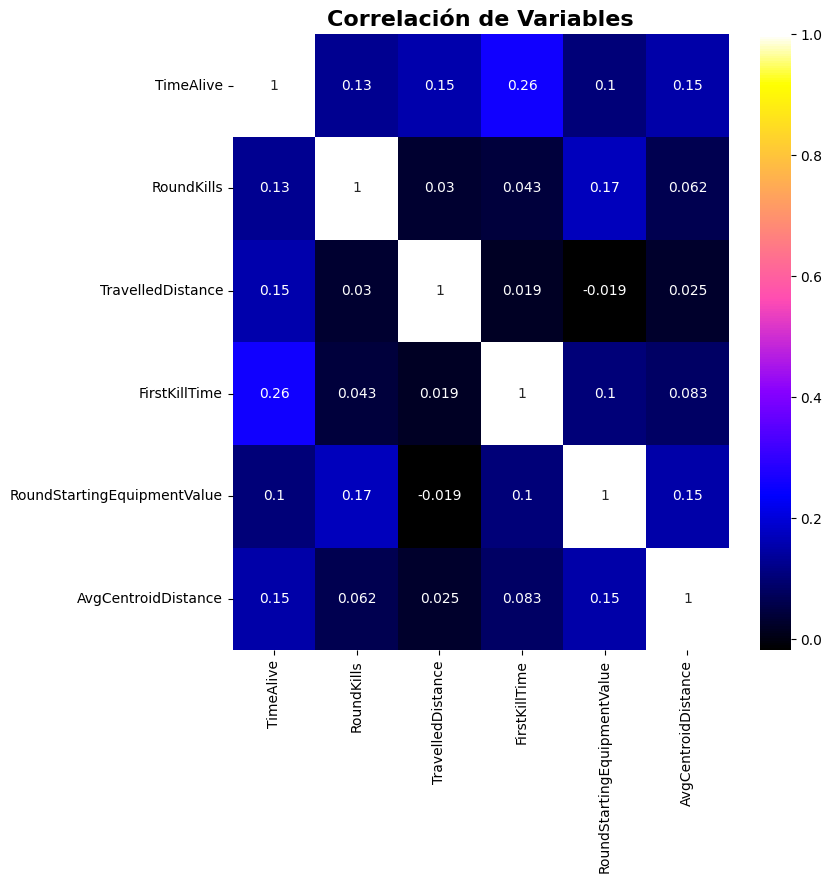

In [58]:
# Creación de un mapa de calor para ver la correlación entre las variables
f, ax = plt.subplots(1, 1, figsize=(8, 8)) # Creamos la figura. 1 fila, 1 columna, tamaño 8x8
ax = sns.heatmap(data_frame[data_frame[['TimeAlive', 'RoundKills','TravelledDistance', 'FirstKillTime', 'RoundStartingEquipmentValue', 'AvgCentroidDistance']].describe().columns].corr(), annot=True, cmap='gnuplot2') # Creamos el mapa de calor. El metodo corr() calcula la correlacion entre las variables.
plt.title("Correlación de Variables", fontsize=16, fontweight="bold") # Titulo del grafico

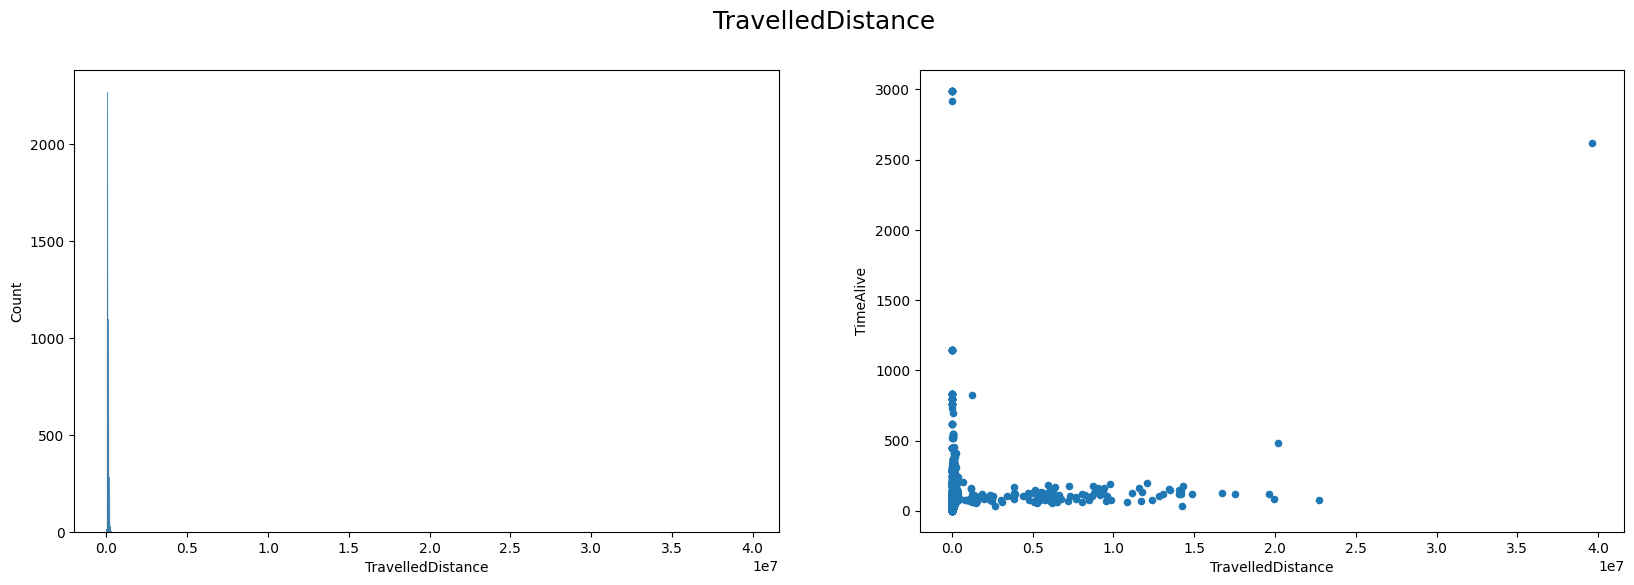

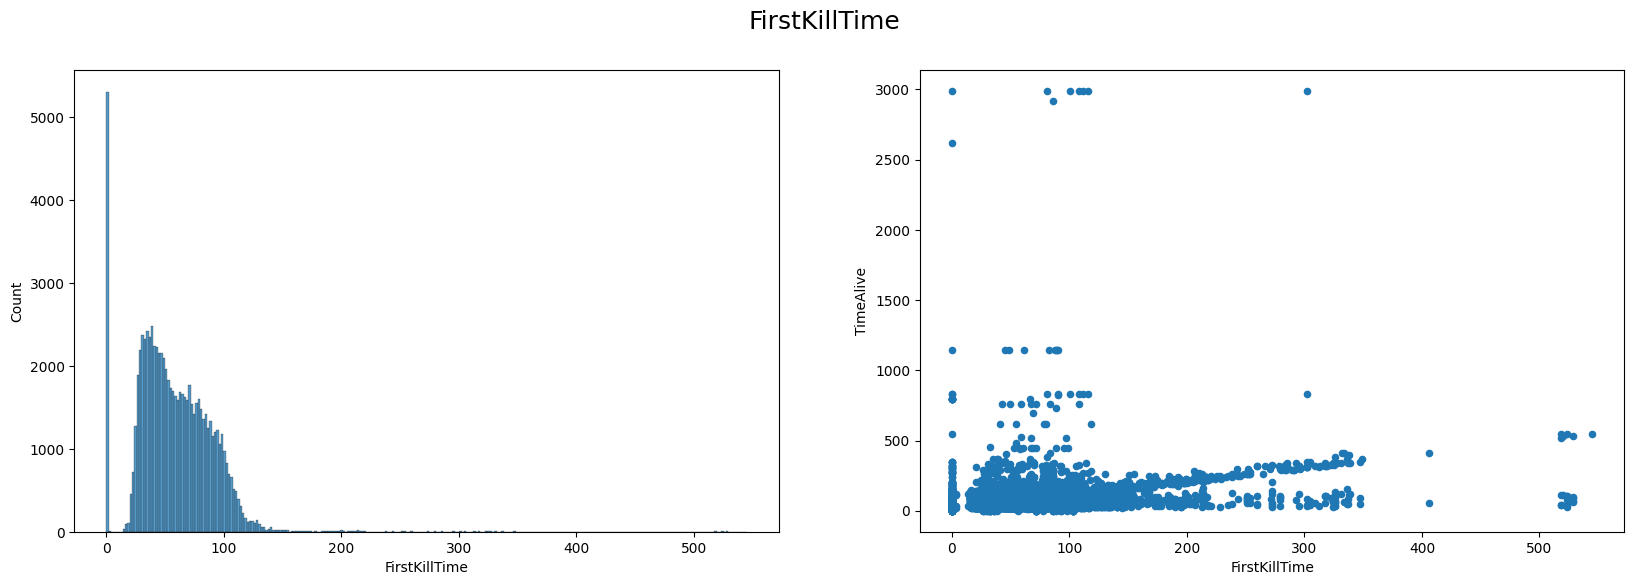

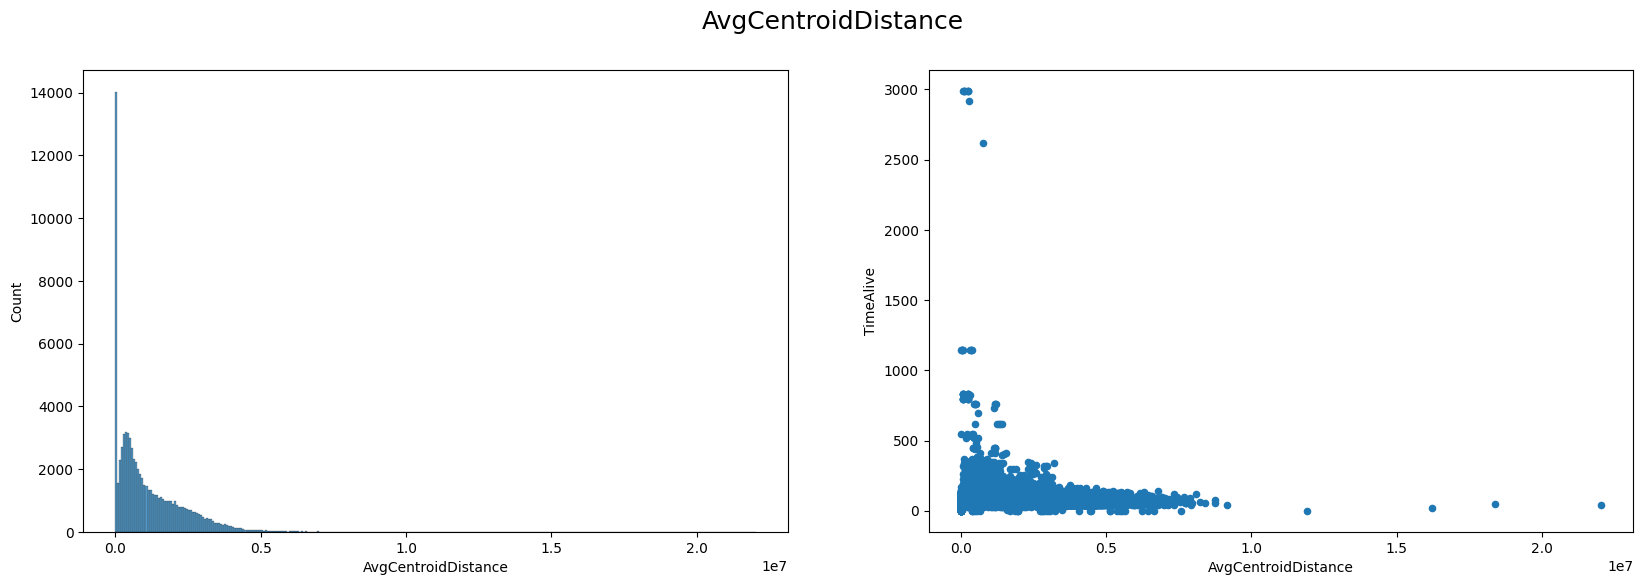

In [59]:
for col in ['TravelledDistance', 'FirstKillTime', 'AvgCentroidDistance']:
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(col, fontsize=18)
    sns.histplot(data_frame[col], ax=ax[0], kde=False)
    data_frame[[col]+['TimeAlive']].plot.scatter(x=col, y='TimeAlive', ax=ax[1])
    plt.show()

In [60]:
data_frame.columns

Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'SteamId', 'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch',
       'TimeAlive', 'ScaledTimeAlive', 'AvgCentroidDistance',
       'TravelledDistance', 'AvgRoundVelocity', 'AvgKillDistance',
       'AvgSiteDistance', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown',
       'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy',
       'PrimarySMG', 'PrimaryPistol', 'FirstKillTime', 'RoundKills',
       'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots',
       'AvgMatchKillDist'],
      dtype='object')

In [61]:
# Eliminamos las columnas que no nos interesan
data_frame = data_frame.drop(['InternalTeamId', 'SteamId'], axis=1)

In [62]:
# Separamos la data en dos grupos: X (variables independientes) e y (variable dependiente)
x = data_frame[["TravelledDistance", "FirstKillTime", "AvgCentroidDistance"]] # Variables predictoras
y = data_frame["TimeAlive"] # Variable a predecir

In [63]:
# Crear el modelo de regresion lineal
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=29) # Particion de los datos. 80% entrenamiento, 20% prueba
# Creamos el modelo
model = LinearRegression()
# Entrenamos el modelo
model.fit(x_train, y_train)
# Validamos el modelo
y_pred = model.predict(x_test)

In [64]:
# Evaluamos el modelo
print(f"R2: {r2_score(y_test, y_pred):.4f}") # Coeficiente de determinacion. Mide la proporcion de la varianza total de la variable dependiente que es explicada por la regresion
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}") # Error cuadratico medio. Mide la diferencia entre los valores predichos y los valores observados
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}") # Error absoluto medio. Mide la diferencia entre los valores predichos y los valores observados
print(f"Score del modelo en entrenamiento: {model.score(x_train, y_train):.4f}") # Score del modelo en entrenamiento
print(f"Score del modelo en prueba: {model.score(x_test, y_test):.4f}") # Score del modelo en prueba

R2: 0.0782
MSE: 1715.8504
MAE: 22.3072
Score del modelo en entrenamiento: 0.1084
Score del modelo en prueba: 0.0782


Los resultados fueron bastante bajos y lamentables

Se verá la opción de incluir variables categoricas

In [65]:
# Guardamos los resultados del MAE (Error absoluto medio) en una lista
history_mae = []
history_mae.append(mean_absolute_error(y_test, y_pred))

In [66]:
# Guardamos los resultados del R2 (Coeficiente de Determinación) en una lista
history_r2 = []
history_r2.append(model.score(x_train, y_train))

In [67]:
df_FrameDat = data_frame[["TimeAlive", "TravelledDistance", "FirstKillTime", "AvgCentroidDistance", "Team", "Map"]]
df_FrameDat

,TimeAlive,TravelledDistance,FirstKillTime,AvgCentroidDistance,Team,Map
0,51.120249,100831.407375,0.000000,3.229091e+05,Terrorist,de_inferno
1,43.486626,60960.883185,0.000000,5.471375e+05,Terrorist,de_inferno
2,37.354698,56422.523836,0.000000,0.000000e+00,Terrorist,de_inferno
3,47.678861,89634.733132,0.000000,7.689232e+05,Terrorist,de_inferno
4,53.122511,108656.497344,0.000000,2.023974e+05,Terrorist,de_inferno
...,...,...,...,...,...,...
79152,34.027207,40481.778529,22.775960,0.000000e+00,CounterTerrorist,de_mirage
79153,29.261054,32134.776126,28.714119,0.000000e+00,CounterTerrorist,de_mirage
79154,59.147178,60051.689383,29.768923,2.279624e+06,CounterTerrorist,de_mirage
79155,42.582843,27987.628542,75.281780,1.502696e+06,CounterTerrorist,de_mirage


In [68]:
# Vemos las variables categoricas del dataset
df_FrameDat.select_dtypes(include=['object']).columns

Index(['Team', 'Map'], dtype='object')

In [69]:
for column in data_frame.columns[data_frame.dtypes == 'object']:
  print(column,"->",data_frame[column].unique())

Map -> ['de_inferno' 'de_nuke' 'de_mirage' 'de_dust2']
Team -> ['Terrorist' 'CounterTerrorist']


In [70]:
# Tratamiento variable Map con One-Hot Encoding
data_transform = pd.get_dummies(df_FrameDat.Map)
df_FrameDat = pd.concat([df_FrameDat, data_transform], axis=1)
df_FrameDat

,TimeAlive,TravelledDistance,FirstKillTime,AvgCentroidDistance,Team,Map,de_dust2,de_inferno,de_mirage,de_nuke
0,51.120249,100831.407375,0.000000,3.229091e+05,Terrorist,de_inferno,False,True,False,False
1,43.486626,60960.883185,0.000000,5.471375e+05,Terrorist,de_inferno,False,True,False,False
2,37.354698,56422.523836,0.000000,0.000000e+00,Terrorist,de_inferno,False,True,False,False
3,47.678861,89634.733132,0.000000,7.689232e+05,Terrorist,de_inferno,False,True,False,False
4,53.122511,108656.497344,0.000000,2.023974e+05,Terrorist,de_inferno,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
79152,34.027207,40481.778529,22.775960,0.000000e+00,CounterTerrorist,de_mirage,False,False,True,False
79153,29.261054,32134.776126,28.714119,0.000000e+00,CounterTerrorist,de_mirage,False,False,True,False
79154,59.147178,60051.689383,29.768923,2.279624e+06,CounterTerrorist,de_mirage,False,False,True,False
79155,42.582843,27987.628542,75.281780,1.502696e+06,CounterTerrorist,de_mirage,False,False,True,False


In [71]:
# Supongamos que tienes una columna "Map_Map1" con valores True o False
df_FrameDat["de_dust2"] = df_FrameDat["de_dust2"].astype(int)
df_FrameDat["de_inferno"] = df_FrameDat["de_inferno"].astype(int)
df_FrameDat["de_mirage"] = df_FrameDat["de_mirage"].astype(int)
df_FrameDat["de_nuke"] = df_FrameDat["de_nuke"].astype(int)

df_FrameDat


,TimeAlive,TravelledDistance,FirstKillTime,AvgCentroidDistance,Team,Map,de_dust2,de_inferno,de_mirage,de_nuke
0,51.120249,100831.407375,0.000000,3.229091e+05,Terrorist,de_inferno,0,1,0,0
1,43.486626,60960.883185,0.000000,5.471375e+05,Terrorist,de_inferno,0,1,0,0
2,37.354698,56422.523836,0.000000,0.000000e+00,Terrorist,de_inferno,0,1,0,0
3,47.678861,89634.733132,0.000000,7.689232e+05,Terrorist,de_inferno,0,1,0,0
4,53.122511,108656.497344,0.000000,2.023974e+05,Terrorist,de_inferno,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
79152,34.027207,40481.778529,22.775960,0.000000e+00,CounterTerrorist,de_mirage,0,0,1,0
79153,29.261054,32134.776126,28.714119,0.000000e+00,CounterTerrorist,de_mirage,0,0,1,0
79154,59.147178,60051.689383,29.768923,2.279624e+06,CounterTerrorist,de_mirage,0,0,1,0
79155,42.582843,27987.628542,75.281780,1.502696e+06,CounterTerrorist,de_mirage,0,0,1,0


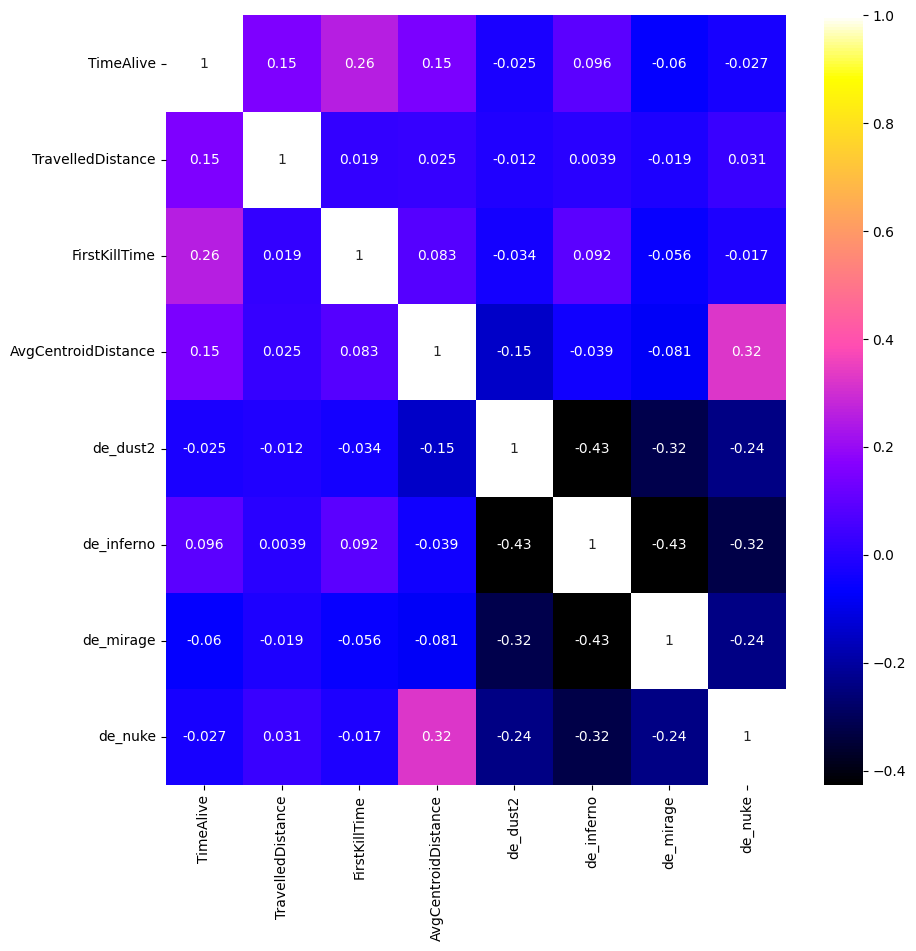

In [72]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df_FrameDat[df_FrameDat.describe().columns].corr(), annot=True, cmap='gnuplot2')

Existe una baja correlación entre las variables de mapas y el tiempo Vivido, la diferencia podria ser minima

## Intento con los mapas

In [73]:
# Separamos la data en dos grupos: X (variables independientes) e y (variable dependiente)
x = df_FrameDat[["TravelledDistance", "FirstKillTime", "AvgCentroidDistance", "de_dust2", "de_inferno", "de_mirage", "de_nuke"]] # Variables predictoras
y = df_FrameDat["TimeAlive"] # Variable a predecir

In [74]:
# Crear el modelo de regresion lineal
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=29) # Particion de los datos. 80% entrenamiento, 20% prueba
# Creamos el modelo
model = LinearRegression()
# Entrenamos el modelo
model.fit(x_train, y_train)
# Validamos el modelo
y_pred = model.predict(x_test)

In [75]:
# Evaluamos el modelo
print(f"R2: {r2_score(y_test, y_pred):.4f}") # Coeficiente de determinacion. Mide la proporcion de la varianza total de la variable dependiente que es explicada por la regresion
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}") # Error cuadratico medio. Mide la diferencia entre los valores predichos y los valores observados
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}") # Error absoluto medio. Mide la diferencia entre los valores predichos y los valores observados
print(f"Score del modelo en entrenamiento: {model.score(x_train, y_train):.4f}") # Score del modelo en entrenamiento
print(f"Score del modelo en prueba: {model.score(x_test, y_test):.4f}") # Score del modelo en prueba

R2: 0.0901
MSE: 1693.5525
MAE: 21.8950
Score del modelo en entrenamiento: 0.1170
Score del modelo en prueba: 0.0901


Leve mejora

In [76]:
history_mae.append(mean_absolute_error(y_pred, y_test))

In [77]:
history_r2.append(model.score(x_train, y_train))

In [81]:
# Tratamiento variable Map con One-Hot Encoding
data_transform = pd.get_dummies(df_FrameDat.Team)
df_FrameDat = pd.concat([df_FrameDat, data_transform], axis=1)
df_FrameDat

,TimeAlive,TravelledDistance,FirstKillTime,AvgCentroidDistance,Team,Map,de_dust2,de_inferno,de_mirage,de_nuke,CounterTerrorist,Terrorist
0,51.120249,100831.407375,0.000000,3.229091e+05,Terrorist,de_inferno,0,1,0,0,False,True
1,43.486626,60960.883185,0.000000,5.471375e+05,Terrorist,de_inferno,0,1,0,0,False,True
2,37.354698,56422.523836,0.000000,0.000000e+00,Terrorist,de_inferno,0,1,0,0,False,True
3,47.678861,89634.733132,0.000000,7.689232e+05,Terrorist,de_inferno,0,1,0,0,False,True
4,53.122511,108656.497344,0.000000,2.023974e+05,Terrorist,de_inferno,0,1,0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
79152,34.027207,40481.778529,22.775960,0.000000e+00,CounterTerrorist,de_mirage,0,0,1,0,True,False
79153,29.261054,32134.776126,28.714119,0.000000e+00,CounterTerrorist,de_mirage,0,0,1,0,True,False
79154,59.147178,60051.689383,29.768923,2.279624e+06,CounterTerrorist,de_mirage,0,0,1,0,True,False
79155,42.582843,27987.628542,75.281780,1.502696e+06,CounterTerrorist,de_mirage,0,0,1,0,True,False


In [82]:
# Supongamos que tienes una columna "Map_Map1" con valores True o False
df_FrameDat["CounterTerrorist"] = df_FrameDat["CounterTerrorist"].astype(int)
df_FrameDat["Terrorist"] = df_FrameDat["Terrorist"].astype(int)
df_FrameDat


,TimeAlive,TravelledDistance,FirstKillTime,AvgCentroidDistance,Team,Map,de_dust2,de_inferno,de_mirage,de_nuke,CounterTerrorist,Terrorist
0,51.120249,100831.407375,0.000000,3.229091e+05,Terrorist,de_inferno,0,1,0,0,0,1
1,43.486626,60960.883185,0.000000,5.471375e+05,Terrorist,de_inferno,0,1,0,0,0,1
2,37.354698,56422.523836,0.000000,0.000000e+00,Terrorist,de_inferno,0,1,0,0,0,1
3,47.678861,89634.733132,0.000000,7.689232e+05,Terrorist,de_inferno,0,1,0,0,0,1
4,53.122511,108656.497344,0.000000,2.023974e+05,Terrorist,de_inferno,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
79152,34.027207,40481.778529,22.775960,0.000000e+00,CounterTerrorist,de_mirage,0,0,1,0,1,0
79153,29.261054,32134.776126,28.714119,0.000000e+00,CounterTerrorist,de_mirage,0,0,1,0,1,0
79154,59.147178,60051.689383,29.768923,2.279624e+06,CounterTerrorist,de_mirage,0,0,1,0,1,0
79155,42.582843,27987.628542,75.281780,1.502696e+06,CounterTerrorist,de_mirage,0,0,1,0,1,0


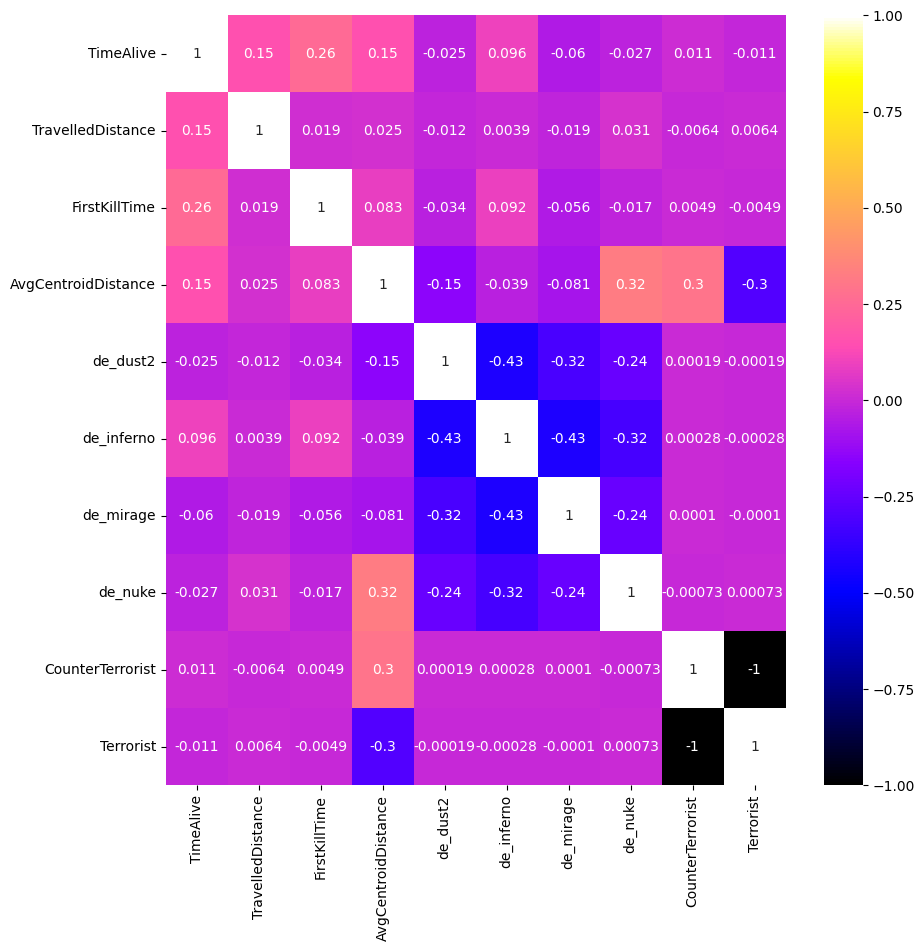

In [83]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df_FrameDat[df_FrameDat.describe().columns].corr(), annot=True, cmap='gnuplot2')

Leve correlación, pueden haber leves diferencias

## Intento con teams

In [84]:
# Separamos la data en dos grupos: X (variables independientes) e y (variable dependiente)
x = df_FrameDat[["TravelledDistance", "FirstKillTime", "AvgCentroidDistance", "de_dust2", "de_inferno", "de_mirage", "de_nuke", "CounterTerrorist", "Terrorist"]] # Variables predictoras
y = df_FrameDat["TimeAlive"] # Variable a predecir

In [85]:
# Crear el modelo de regresion lineal
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=29) # Particion de los datos. 80% entrenamiento, 20% prueba
# Creamos el modelo
model = LinearRegression()
# Entrenamos el modelo
model.fit(x_train, y_train)
# Validamos el modelo
y_pred = model.predict(x_test)

In [86]:
# Evaluamos el modelo
print(f"R2: {r2_score(y_test, y_pred):.4f}") # Coeficiente de determinacion. Mide la proporcion de la varianza total de la variable dependiente que es explicada por la regresion
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}") # Error cuadratico medio. Mide la diferencia entre los valores predichos y los valores observados
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}") # Error absoluto medio. Mide la diferencia entre los valores predichos y los valores observados
print(f"Score del modelo en entrenamiento: {model.score(x_train, y_train):.4f}") # Score del modelo en entrenamiento
print(f"Score del modelo en prueba: {model.score(x_test, y_test):.4f}") # Score del modelo en prueba

R2: 0.0922
MSE: 1689.6274
MAE: 21.8104
Score del modelo en entrenamiento: 0.1181
Score del modelo en prueba: 0.0922
